# Chuleta esencial de **R** (notebook didáctico)

Autor: José Manuel Sánchez Álvarez  
Centro: IES Rafael Alberti — Curso 2025–2026  

Este notebook resume lo **básico de R** (variables, tipos, operadores, estructuras, control, funciones, E/S de datos y gráficos).  
Pensado para ejecutarse en **VS Code** y **JupyterLab** con **kernel R**.


## 0. Preparación del entorno

- Se cargará `tidyverse` para disponer de `dplyr`, `ggplot2`, `readr`, etc.
- Los gráficos aparecerán **inline** en el notebook.


In [21]:
suppressPackageStartupMessages({
  if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse", repos = "https://cloud.r-project.org")
  }
  if (!requireNamespace("ggcorrplot", quietly = TRUE)) {
    install.packages("ggcorrplot", repos = "https://cloud.r-project.org")
  }
  library(tidyverse)
  library(ggcorrplot)
})
options(repr.plot.width = 7, repr.plot.height = 4)  # Tamaño de gráficos inline (si está disponible)
sessionInfo()


R version 4.5.2 (2025-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 26100)

Matrix products: default
  LAPACK version 3.12.1

locale:
[1] LC_COLLATE=Spanish_Spain.utf8  LC_CTYPE=Spanish_Spain.utf8   
[3] LC_MONETARY=Spanish_Spain.utf8 LC_NUMERIC=C                  
[5] LC_TIME=Spanish_Spain.utf8    

time zone: Europe/Madrid
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggcorrplot_0.1.4.1 lubridate_1.9.4    forcats_1.0.1      stringr_1.6.0     
 [5] dplyr_1.1.4        purrr_1.2.0        readr_2.1.5        tidyr_1.3.1       
 [9] tibble_3.3.0       ggplot2_4.0.0      tidyverse_2.0.0   

loaded via a namespace (and not attached):
 [1] gtable_0.3.6       jsonlite_2.0.0     compiler_4.5.2     crayon_1.5.3      
 [5] tidyselect_1.2.1   IRdisplay_1.1      systemfonts_1.3.1  scales_1.4.0      
 [9] textshaping_1.0.4  uuid_1.2-1         fastmap_1.2.0  

## 1. Variables y tipos

En R se recomienda usar la **asignación con flecha** `<-`, aunque `=` también funciona. R es **1-indexado**.


In [22]:
x <- 10          # asignación recomendada
y = 20           # también válido
z <- x + y
z

num <- 3.14
ent <- 10L
logi <- TRUE
cad <- "Hola"
comp <- 3 + 2i

list(
  is_numeric = is.numeric(num),
  is_integer = is.integer(ent),
  is_logical = is.logical(logi),
  is_character = is.character(cad),
  is_complex = is.complex(comp)
)


[1] 30

$is_numeric
[1] TRUE

$is_integer
[1] TRUE

$is_logical
[1] TRUE

$is_character
[1] TRUE

$is_complex
[1] TRUE

### Conversión de tipos


In [23]:
as.numeric("3.14")
as.character(42)
as.logical(1)   # TRUE


[1] 3.14

[1] "42"

[1] TRUE

## 2. Operadores

**Aritméticos, comparación y lógicos**.


In [24]:
a <- 10; b <- 3
c(a_plus_b = a + b,
  a_minus_b = a - b,
  a_times_b = a * b,
  a_div_b = a / b,
  a_pow_b = a ^ b,
  a_mod_b = a %% b,
  a_intdiv_b = a %/% b)

x <- 5; y <- 7
c(eq = x == y,
  ne = x != y,
  lt = x < y,
  gt = x > y,
  and_op = (x > 0) & (y > 0),
  or_op = (x > 0) | (y < 0),
  not_true = !TRUE)


a_plus_b   a_minus_b   a_times_b     a_div_b     a_pow_b     a_mod_b 
  13.000000    7.000000   30.000000    3.333333 1000.000000    1.000000 
 a_intdiv_b 
   3.000000

eq       ne       lt       gt   and_op    or_op not_true 
   FALSE     TRUE     TRUE    FALSE     TRUE     TRUE    FALSE

## 3. Estructuras de datos

- **Vectores** (homogéneos)
- **Listas** (heterogéneas)
- **Matrices**
- **Data frames** (tabulares)


### 3.1 Vectores


In [25]:
nums <- c(1, 2, 3, 4)
chars <- c("a", "b", "c")
list(
  first = nums[1],      # 1-indexado
  len = length(nums),
  sum = sum(nums),
  mean = mean(nums)
)


$first
[1] 1

$len
[1] 4

$sum
[1] 10

$mean
[1] 2.5

### 3.2 Listas


In [26]:
persona <- list(nombre = "Ana", edad = 25, notas = c(8, 9, 10))
persona$nombre
persona$notas[2]


[1] "Ana"

[1] 9

### 3.3 Matrices


In [27]:
m <- matrix(1:9, nrow = 3, ncol = 3)
m
t(m)              # transpuesta
m[1, 2]           # fila 1, columna 2


1,4,7
2,5,8
3,6,9


1,2,3
4,5,6
7,8,9


[1] 4

### 3.4 Data frames


In [28]:
df <- data.frame(
  nombre = c("Ana", "Luis", "Marta"),
  edad = c(20, 22, 19),
  nota = c(8.5, 7.3, 9.1)
)
head(df)
df$edad
mean(df$nota)


,nombre,edad,nota
,<chr>,<dbl>,<dbl>
1,Ana,20,8.5
2,Luis,22,7.3
3,Marta,19,9.1


[1] 20 22 19

[1] 8.3

## 4. Control de flujo


### 4.1 `if` / `else if` / `else`


In [29]:
x <- 10
if (x > 0) {
  print("Positivo")
} else if (x == 0) {
  print("Cero")
} else {
  print("Negativo")
}


[1] "Positivo"


### 4.2 Bucle `for`


In [30]:
for (i in 1:5) {
  print(i)
}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


### 4.3 Bucle `while`


In [31]:
i <- 1
while (i <= 5) {
  print(i)
  i <- i + 1
}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


### 4.4 Bucle `repeat` (romper con `break`)


In [32]:
i <- 1
repeat {
  print(i)
  i <- i + 1
  if (i > 5) break
}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


## 5. Funciones


### 5.1 Definición y retorno


In [33]:
suma <- function(a, b) {
  return(a + b)
}
suma(3, 5)


[1] 8

### 5.2 Parámetros por defecto y funciones anónimas


In [34]:
potencia <- function(base, exp = 2) { base ^ exp }
c(pot_2 = potencia(3), pot_3 = potencia(3, 3))

lapply(1:5, function(x) x^2)


pot_2 pot_3 
    9    27

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[[4]]
[1] 16

[[5]]
[1] 25

## 6. Funciones predefinidas útiles


In [40]:
# Matemáticas
nums <- c(2, 4, 6, 8)
c(sum = sum(nums), mean = mean(nums), sd = sd(nums), var = var(nums))
round(3.14159, 2)

# Texto
txt <- "Programar en R es genial"
c(nchar = nchar(txt))
toupper(txt)
tolower(txt)
paste("Hola", "mundo", sep = " ")
substr(txt, 1, 9)


sum      mean        sd       var 
20.000000  5.000000  2.581989  6.666667

[1] 3.14

nchar 
   24

[1] "PROGRAMAR EN R ES GENIAL"

[1] "programar en r es genial"

[1] "Hola mundo"

[1] "Programar"

## 7. Lectura y escritura de datos (CSV)


In [36]:
# Ejemplo (cambiar rutas según tus archivos):
# datos <- read.csv("archivo.csv", sep = ",", header = TRUE)
# write.csv(datos, "salida.csv", row.names = FALSE)
cat("Descomenta y ajusta las rutas para probar read.csv()/write.csv().\n")


Descomenta y ajusta las rutas para probar read.csv()/write.csv().


## 8. Gráficos básicos


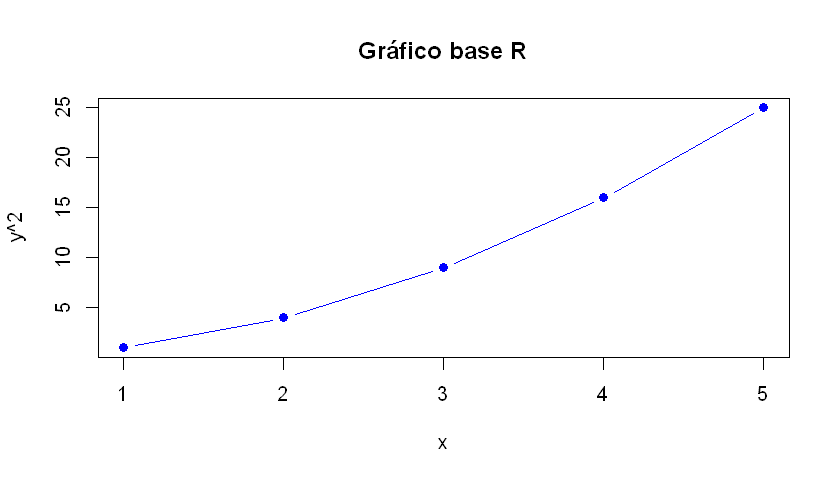

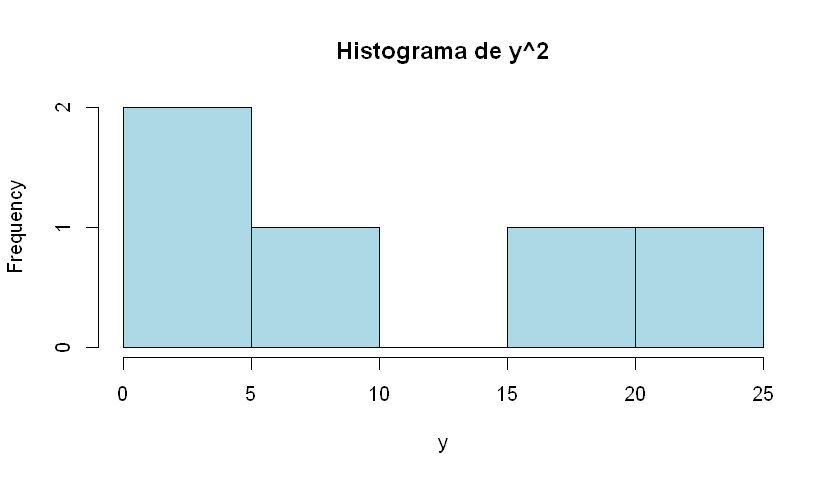

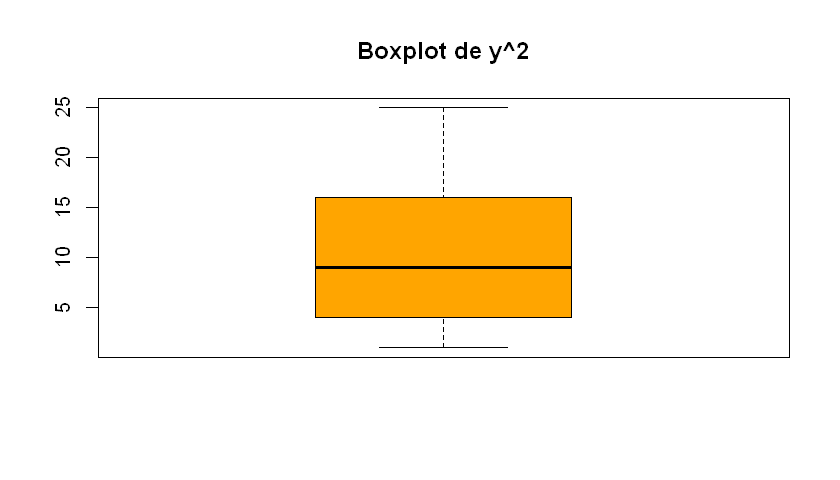

In [37]:
x <- c(1, 2, 3, 4, 5)
y <- x^2
plot(x, y, type = "b", col = "blue", pch = 19,
     main = "Gráfico base R", xlab = "x", ylab = "y^2")

hist(y, col = "lightblue", main = "Histograma de y^2")

boxplot(y, main = "Boxplot de y^2", col = "orange")


### 8.1 Gráfico con ggplot2 (estilo EDA)


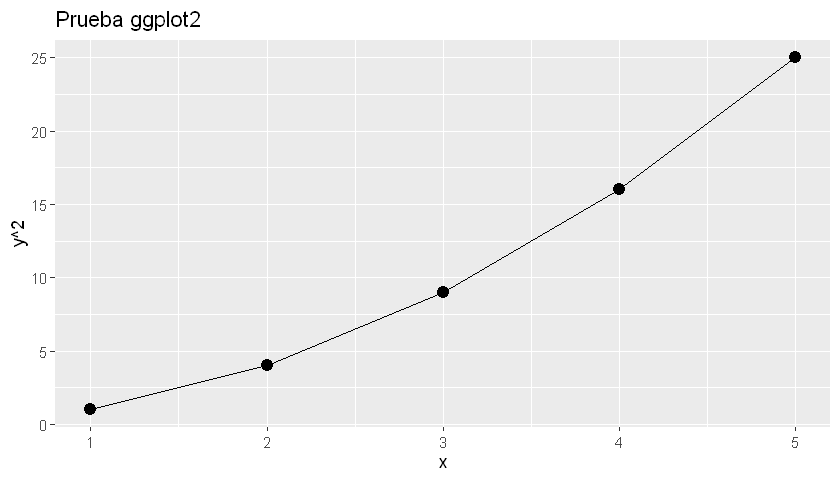

In [38]:
dfg <- tibble(x = x, y = y)
ggplot(dfg, aes(x, y)) +
  geom_line() +
  geom_point(size = 3) +
  labs(title = "Prueba ggplot2", x = "x", y = "y^2")


## 9. (Opcional) Correlaciones rápidas con `ggcorrplot`


Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggcorrplot package.
  Please report the issue at <https://github.com/kassambara/ggcorrplot/issues>."


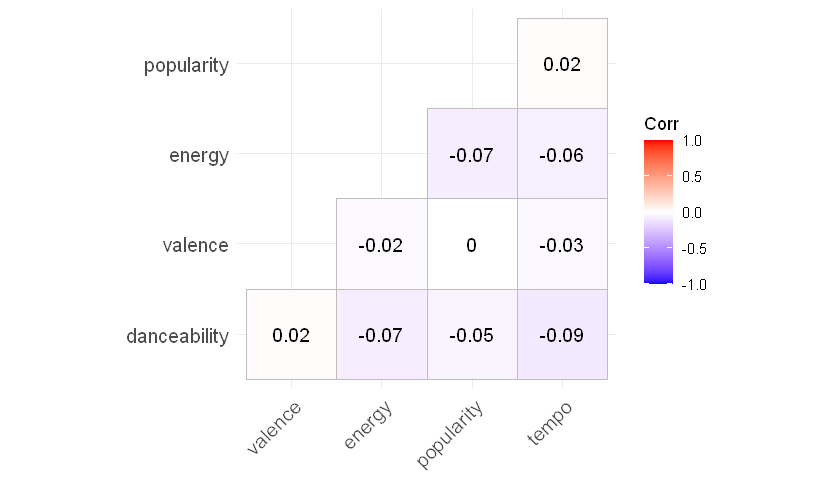

In [39]:
set.seed(123)
demo <- tibble(
  popularity = runif(200, 0, 100),
  danceability = runif(200, 0, 1),
  energy = runif(200, 0, 1),
  valence = runif(200, 0, 1),
  tempo = rnorm(200, 120, 20)
)
M <- cor(demo)
ggcorrplot(M, hc.order = TRUE, type = "lower", lab = TRUE)


## 10. Comparativa rápida Python vs R

| Concepto | Python | R |
|---|---|---|
| Asignación | `x = 3` | `x <- 3` |
| Imprimir | `print(x)` | `print(x)` |
| Tipo | `type(x)` | `class(x)` |
| Lista | `[1, 2, 3]` | `c(1, 2, 3)` |
| Índices | 0-based | 1-based |
| Longitud | `len(x)` | `length(x)` |
| Suma de vector | `sum(x)` | `sum(x)` |
| Bucle | `for i in range(5):` | `for (i in 1:5) {}` |
| Función | `def f(x):` | `f <- function(x) {}` |
| DataFrame | `pd.DataFrame()` | `data.frame()` |
